import required packages

In [278]:
# Third party packages.
import pandas as pd             # Data handling
import numpy as np              # Numeric calculations
import pickle                   # Save and load data
import altair as alt            # Visualize data
# import seaborn as sns           # Visualize data
import matplotlib.pyplot as plt # Visualize data
import json
from scipy.stats import pearsonr # Correlation

load csv file

In [279]:
# Replace 'your_file.xls' with your actual file name or path
df_hr_orig_data = pd.read_excel('../../data/HRIS_extract_addY.xlsx')

# Display the DataFrame
print(df_hr_orig_data.head())


      Unnamed: 0 Snapshot_Date  Employee_ID  Team_ID  Gender  Age  Hire_date  \
0  2011000000153    2011-01-01          153        1    Male   39 2003-01-01   
1  2011000000158    2011-01-01          158        1  Female   38 2001-06-01   
2  2011000000159    2011-01-01          159        1  Female   42 1994-05-01   
3  2011000000162    2011-01-01          162        1    Male   36 2002-04-01   
4  2011000000163    2011-01-01          163        1    Male   39 2004-01-01   

   Tenure  Job_Level  Salary  Distance_from_work  Days_absent  \
0       8          6   65298                  23            0   
1      10          8   80780                  72            7   
2      17          8   73284                  96            8   
3       9          9   94401                  67            0   
4       7          6   46853                  89            0   

   Performance_Rating Potential_Rating  Turnover     Retirement  \
0                 4.0              Low     False  No Retireme

set pandas dataframe settings

In [280]:
# Setting Pandas options.
pd.set_option("display.max_rows", 50) # How to display all rows from data frame using pandas. Setting value to None to show all rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 100)
pd.set_option("display.max_info_rows", 1000000)
pd.set_option("display.precision", 2)
#pd.set_option("styler.format.precision", 2)

Descriptive analytics

In [281]:
# Show a sample of first 3 rows.
df_hr_orig_data.head(3)

df_hr_orig_data['Turnover_clean'] = df_hr_orig_data['Turnover'].astype(str).str.strip().str.upper()
df_hr_orig_data['Gender_clean'] = df_hr_orig_data['Gender'].astype(str).str.strip().str.upper()
df_hr_orig_data['Potential_Rating_clean'] = df_hr_orig_data['Potential_Rating'].astype(str).str.strip().str.upper()
df_hr_orig_data['Retirement_clean'] = df_hr_orig_data['Retirement'].astype(str).str.strip().str.upper()


# If they are strings "TRUE"/"FALSE" instead of boolean True/False:
df_hr_orig_data['Turnover_numeric'] = df_hr_orig_data['Turnover_clean'].map({'TRUE': 1, 'FALSE': 0})
df_hr_orig_data['Gender_numeric'] = df_hr_orig_data['Gender_clean'].map({'MALE': 1, 'FEMALE': 0})
df_hr_orig_data['Potential_Rating_numeric'] = df_hr_orig_data['Potential_Rating_clean'].map({'LOW': 1, 'MEDIUM': 0})
df_hr_orig_data['Retirement_numeric'] = df_hr_orig_data['Retirement_clean'].map({'Retirement': 1, 'MEDIUM': 0})


# 'Gender', 'Potential_Rating', 'Turnover_clean'



# Show a sample of first 3 rows.
df_hr_orig_data.head(3)


,Unnamed: 0,Snapshot_Date,Employee_ID,Team_ID,Gender,Age,Hire_date,Tenure,Job_Level,Salary,Distance_from_work,Days_absent,Performance_Rating,Potential_Rating,Turnover,Retirement,Employee_turnover (Y),Payhouse_Level,Turnover_clean,Gender_clean,Potential_Rating_clean,Retirement_clean,Turnover_numeric,Gender_numeric,Potential_Rating_numeric,Retirement_numeric
0,2011000000153,2011-01-01,153,1,Male,39,2003-01-01,8,6,65298,23,0,4.0,Low,False,No Retirement,0,NaN,FALSE,MALE,LOW,NO RETIREMENT,0,1,1.0,NaN
1,2011000000158,2011-01-01,158,1,Female,38,2001-06-01,10,8,80780,72,7,3.0,Medium,False,No Retirement,0,NaN,FALSE,FEMALE,MEDIUM,NO RETIREMENT,0,0,0.0,NaN
2,2011000000159,2011-01-01,159,1,Female,42,1994-05-01,17,8,73284,96,8,3.0,Medium,False,No Retirement,0,NaN,FALSE,FEMALE,MEDIUM,NO RETIREMENT,0,0,0.0,NaN


Data Understanding

a. Which variables are numerical and which can categorical? How many variables are of both types?

In [282]:
print(
    f"Number of columns in the original data: "
    f"{df_hr_orig_data.shape[1]}"
    "\n"
)

df_orig_num    = df_hr_orig_data.select_dtypes(include='number')
l_df_num_names = df_orig_num.columns.tolist()

print(f"\nNumber of numerical variables: {len(l_df_num_names)}")
print(l_df_num_names)


df_orig_cat    = df_hr_orig_data.select_dtypes(include='object')
l_df_cat_names = list(df_orig_cat.columns)

print(f"\nNumber of categorical variables: {len(l_df_cat_names)}")
print(l_df_cat_names)


Number of columns in the original data: 26


Number of numerical variables: 16
['Unnamed: 0', 'Employee_ID', 'Team_ID', 'Age', 'Tenure', 'Job_Level', 'Salary', 'Distance_from_work', 'Days_absent', 'Performance_Rating', 'Employee_turnover (Y)', 'Payhouse_Level', 'Turnover_numeric', 'Gender_numeric', 'Potential_Rating_numeric', 'Retirement_numeric']

Number of categorical variables: 7
['Gender', 'Potential_Rating', 'Retirement', 'Turnover_clean', 'Gender_clean', 'Potential_Rating_clean', 'Retirement_clean']


Next to check for missing values, variable completeness

df_orig_num.info()

Create a frequency table counting number of missing values per variable

In [283]:
# Pandas Series with type of each variable (variable, column) in df_orig.
ps_missing_type    = df_hr_orig_data.dtypes

# Number of missing data per variable.
ps_missing_total   = df_hr_orig_data.isnull().sum()

# Percentage of missing per variable.
ps_missing_percent = round(100 * ps_missing_total / df_hr_orig_data.shape[0], 1)

In [284]:
# Create table (Pandas DataFrame).
df_missing_data = pd.DataFrame({

    'data_type':   ps_missing_type,
    'empty_total': ps_missing_total,
    'empty_perc':  ps_missing_percent
})

# Sort table by number of missing data in descending order.
df_missing_data.sort_values(
    by        = 'empty_total',
    ascending = False,
    inplace   = True
)

# Remove variables that have no missing values.
df_missing_data = df_missing_data.query("empty_total > 0")

# Show table.
print(
    f"Number of variables having missing data: "
    f"{df_missing_data.shape[0]} (out of {df_hr_orig_data.shape[1]})"
)

df_missing_data

Number of variables having missing data: 5 (out of 26)


,data_type,empty_total,empty_perc
Retirement_numeric,float64,6109,100.0
Payhouse_Level,float64,6109,100.0
Potential_Rating_numeric,float64,1222,20.0
Potential_Rating,object,675,11.0
Performance_Rating,float64,37,0.6


Conduct descriptive / summary statistics

In [285]:
df_orig_num.describe()
df_orig_cat.describe()

,Gender,Potential_Rating,Retirement,Turnover_clean,Gender_clean,Potential_Rating_clean,Retirement_clean
count,6109,5434,6109,6109,6109,6109,6109
unique,2,3,2,2,2,4,2
top,Male,Low,No Retirement,FALSE,MALE,LOW,NO RETIREMENT
freq,3729,3349,6088,5358,3729,3349,6088


data preparation phase

In [286]:
df_orig_num.median()

Unnamed: 0                  2.02e+12
Employee_ID                 7.46e+02
Team_ID                     9.00e+00
Age                         4.20e+01
Tenure                      3.00e+00
Job_Level                   8.00e+00
Salary                      8.44e+04
Distance_from_work          5.90e+01
Days_absent                 0.00e+00
Performance_Rating          3.00e+00
Employee_turnover (Y)       0.00e+00
Payhouse_Level                   NaN
Turnover_numeric            0.00e+00
Gender_numeric              1.00e+00
Potential_Rating_numeric    1.00e+00
Retirement_numeric               NaN
dtype: float64

Impute missing values

In [287]:
df_imputed_num = df_orig_num.replace(np.nan, df_orig_num.median())

print("Median values in original numerical data (first five variables):")
print(df_orig_num.median().head(5))

print("\nMedian values in imputed numerical data (first five variables):")
print(df_imputed_num.median().head(5))


print(
    f"\nNumber of missing data in imputed data: "
    f"{df_imputed_num.isna().sum().sum()}"
)

Median values in original numerical data (first five variables):
Unnamed: 0     2.02e+12
Employee_ID    7.46e+02
Team_ID        9.00e+00
Age            4.20e+01
Tenure         3.00e+00
dtype: float64

Median values in imputed numerical data (first five variables):
Unnamed: 0     2.02e+12
Employee_ID    7.46e+02
Team_ID        9.00e+00
Age            4.20e+01
Tenure         3.00e+00
dtype: float64

Number of missing data in imputed data: 12218


Imput missing values for categorical variable

In [288]:
df_orig_cat.mode()

,Gender,Potential_Rating,Retirement,Turnover_clean,Gender_clean,Potential_Rating_clean,Retirement_clean
0,Male,Low,No Retirement,FALSE,MALE,LOW,NO RETIREMENT


To check for timezone error, if any

Intereative Plot

Further analysis 

In [289]:
# 1. Check for Missing Values
print("Missing Values:\n")
print(df_hr_orig_data.isnull().sum())
print("\nPercentage of Missing Values:\n")
print((df_hr_orig_data.isnull().sum() / len(df_hr_orig_data)) * 100)

# 2. Check for Duplicates
print("\nDuplicate Rows:\n")
print(df_hr_orig_data.duplicated().sum())

# 3. Check Data Types
print("\nData Types:\n")
print(df_hr_orig_data.dtypes)

Missing Values:

Unnamed: 0                     0
Snapshot_Date                  0
Employee_ID                    0
Team_ID                        0
Gender                         0
Age                            0
Hire_date                      0
Tenure                         0
Job_Level                      0
Salary                         0
Distance_from_work             0
Days_absent                    0
Performance_Rating            37
Potential_Rating             675
Turnover                       0
Retirement                     0
Employee_turnover (Y)          0
Payhouse_Level              6109
Turnover_clean                 0
Gender_clean                   0
Potential_Rating_clean         0
Retirement_clean               0
Turnover_numeric               0
Gender_numeric                 0
Potential_Rating_numeric    1222
Retirement_numeric          6109
dtype: int64

Percentage of Missing Values:

Unnamed: 0                    0.00
Snapshot_Date                 0.00
Employee_I

0

Data Types:

Unnamed: 0                           int64
Snapshot_Date               datetime64[ns]
Employee_ID                          int64
Team_ID                              int64
Gender                              object
Age                                  int64
Hire_date                   datetime64[ns]
Tenure                               int64
Job_Level                            int64
Salary                               int64
Distance_from_work                   int64
Days_absent                          int64
Performance_Rating                 float64
Potential_Rating                    object
Turnover                              bool
Retirement                          object
Employee_turnover (Y)                int64
Payhouse_Level                     float64
Turnover_clean                      object
Gender_clean                        object
Potential_Rating_clean              object
Retirement_clean                    object
Turnover_numeric                     i

In [290]:
# 4. Basic Outlier Detection using IQR
print("\nOutlier Detection (IQR Method):\n")
for column in df_hr_orig_data.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df_hr_orig_data[column].quantile(0.25)
    Q3 = df_hr_orig_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_hr_orig_data[(df_hr_orig_data[column] < (Q1 - 1.5 * IQR)) | (df_hr_orig_data[column] > (Q3 + 1.5 * IQR))]
    print(f"{column}: {len(outliers)} outliers detected")


Outlier Detection (IQR Method):

Unnamed: 0: 0 outliers detected
Employee_ID: 0 outliers detected
Team_ID: 165 outliers detected
Age: 0 outliers detected
Tenure: 434 outliers detected
Job_Level: 0 outliers detected
Salary: 80 outliers detected
Distance_from_work: 238 outliers detected
Days_absent: 582 outliers detected
Performance_Rating: 0 outliers detected
Employee_turnover (Y): 0 outliers detected
Payhouse_Level: 0 outliers detected
Turnover_numeric: 751 outliers detected
Gender_numeric: 0 outliers detected
Potential_Rating_numeric: 0 outliers detected
Retirement_numeric: 0 outliers detected


In [291]:
# 5. Summary Statistics
print("\nSummary Statistics:\n")
print(df_hr_orig_data.describe(include='all'))


Summary Statistics:

        Unnamed: 0                  Snapshot_Date  Employee_ID  Team_ID  \
count     6.11e+03                           6109      6109.00  6109.00   
unique         NaN                            NaN          NaN      NaN   
top            NaN                            NaN          NaN      NaN   
freq           NaN                            NaN          NaN      NaN   
mean      2.02e+12  2019-08-02 09:33:44.226551040       823.02    13.80   
min       2.01e+12            2011-01-01 00:00:00       153.00     1.00   
25%       2.02e+12            2017-01-01 00:00:00       436.00     5.00   
50%       2.02e+12            2020-01-01 00:00:00       746.00     9.00   
75%       2.02e+12            2023-01-01 00:00:00      1151.00    21.00   
max       2.02e+12            2024-01-01 00:00:00      2034.00    68.00   
std       3.73e+09                            NaN       471.39    12.42   

       Gender      Age                      Hire_date   Tenure  Job_Level  \


Check Co-relation


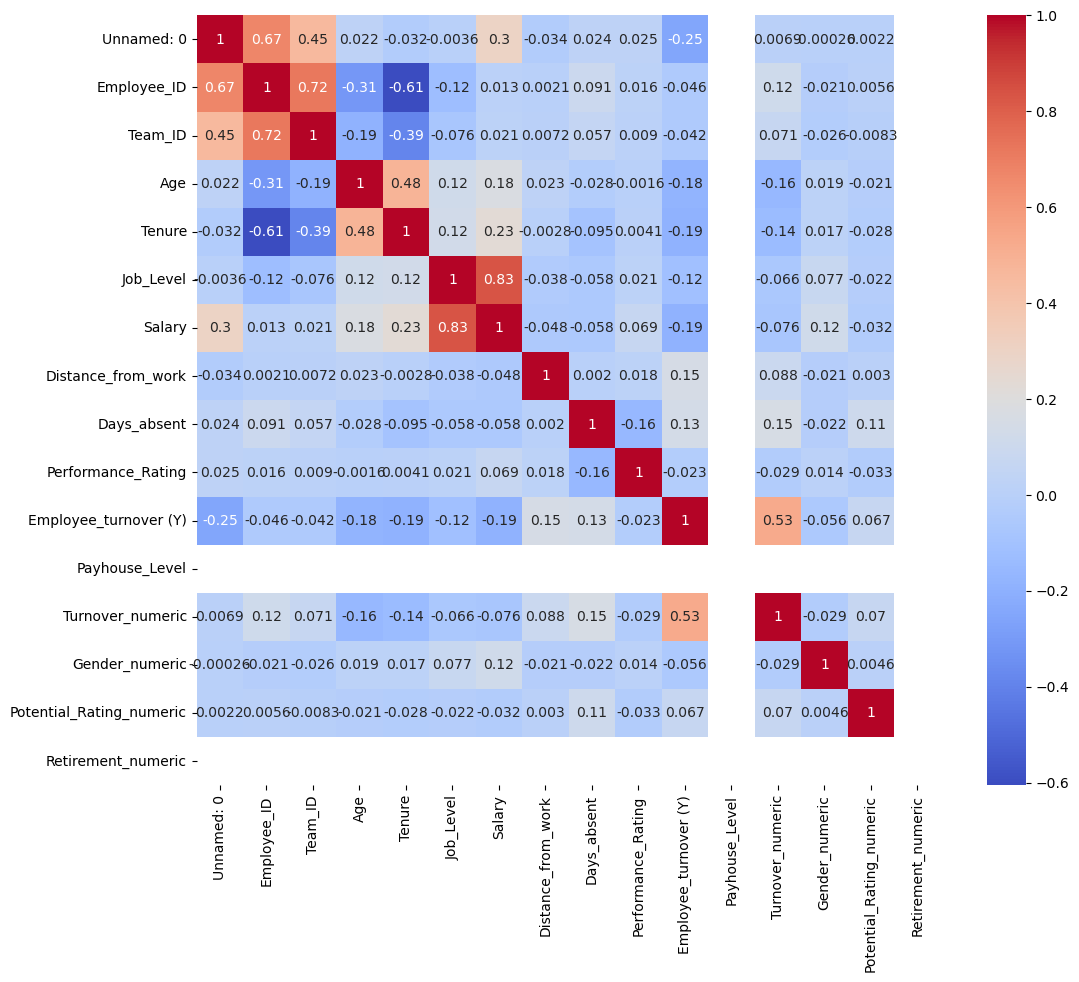

Highly correlated features:
 []


In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# This picks only numeric columns (int, float)
df_numeric = df_hr_orig_data.select_dtypes(include=['number'])

# Now you can run correlation
corr_matrix = df_numeric.corr()

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Find features with correlation > 0.9
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                 for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly correlated features:\n", high_corr_var)


In [293]:
from sklearn.feature_selection import SelectKBest, f_classif

print(df_hr_orig_data.dtypes)

df_hr_orig_data['Hire_date_numeric'] = pd.to_datetime(df_hr_orig_data['Hire_date']).map(pd.Timestamp.toordinal)
df_hr_orig_data = df_hr_orig_data.drop(columns=['Snapshot_Date'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Hire_date'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Gender'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Gender_clean'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Potential_Rating'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Potential_Rating_clean'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Turnover'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Turnover_clean'])
df_hr_orig_data = df_hr_orig_data.drop(columns=['Retirement_clean'])




for col in df_hr_orig_data.columns:
    try:
        df_hr_orig_data[col] = pd.to_numeric(df_hr_orig_data[col], errors='raise')  # Will raise an error if conversion fails
    except Exception as e:
        print(f"Error in column '{col}': {e}")


df_hr_orig_data.head(3)


df = df_hr_orig_data.dropna()

X = df.drop('Turnover_numeric', axis=1)
y = df['Turnover_numeric']

selector = SelectKBest(score_func=f_classif, k=10)  # Top 10 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:\n", selected_features)


Unnamed: 0                           int64
Snapshot_Date               datetime64[ns]
Employee_ID                          int64
Team_ID                              int64
Gender                              object
Age                                  int64
Hire_date                   datetime64[ns]
Tenure                               int64
Job_Level                            int64
Salary                               int64
Distance_from_work                   int64
Days_absent                          int64
Performance_Rating                 float64
Potential_Rating                    object
Turnover                              bool
Retirement                          object
Employee_turnover (Y)                int64
Payhouse_Level                     float64
Turnover_clean                      object
Gender_clean                        object
Potential_Rating_clean              object
Retirement_clean                    object
Turnover_numeric                     int64
Gender_nume

ValueError: Found array with 0 sample(s) (shape=(0, 17)) while a minimum of 1 is required by SelectKBest.

Feature Importance from Models
Time taken 23m 39.8s

capacity_21                   0.03
production_wastepower         0.03
capacity_4                    0.03
production_heatpump           0.03
volume_28                     0.03
production_cofiring           0.03
production_fossilgaspower     0.03
production_electricitymix     0.03
capacity_28                   0.03
capacity_8                    0.03
capacity_27                   0.03
production_CHP_total          0.03
capacity_18                   0.03
production_wind               0.03
capacity_35                   0.03
capacity_0                    0.03
capacity_1                    0.03
capacity_17                   0.03
production_windoffshore       0.03
production_allconsuminggas    0.03
production_windoffshoreB      0.03
capacity_9                    0.03
capacity_51                   0.03
capacity_22                   0.02
production_solarthermal       0.02
production_geothermal         0.02
capacity_50                   0.02
production_waste              0.02
capacity_13                   0.02
production_biomass            0.02
capacity_11                   0.02
production_biomasspower       0.02
capacity_25                   0.02
capacity_19                   0.02
production_fossilhardcoal     0.02
production_solar              0.02
capacity_2                    0.02
capacity_20                   0.01
production_nuclear            0.01
capacity_14                   0.01
production_wood               0.01
capacity_12                   0.00
capacity_26                   0.00
capacity_10                   0.00
production_other              0.00
production_otherpower         0.00
production_biooil             0.00
dtype: float64

Age                         0.15
Salary                      0.14
Distance_from_work          0.12
Employee_ID                 0.11
Hire_date_numeric           0.10
Team_ID                     0.08
Days_absent                 0.08
Tenure                      0.07
Performance_Rating          0.05
Job_Level                   0.04
Gender_numeric              0.02
Potential_Rating_numeric    0.02
dtype: float64


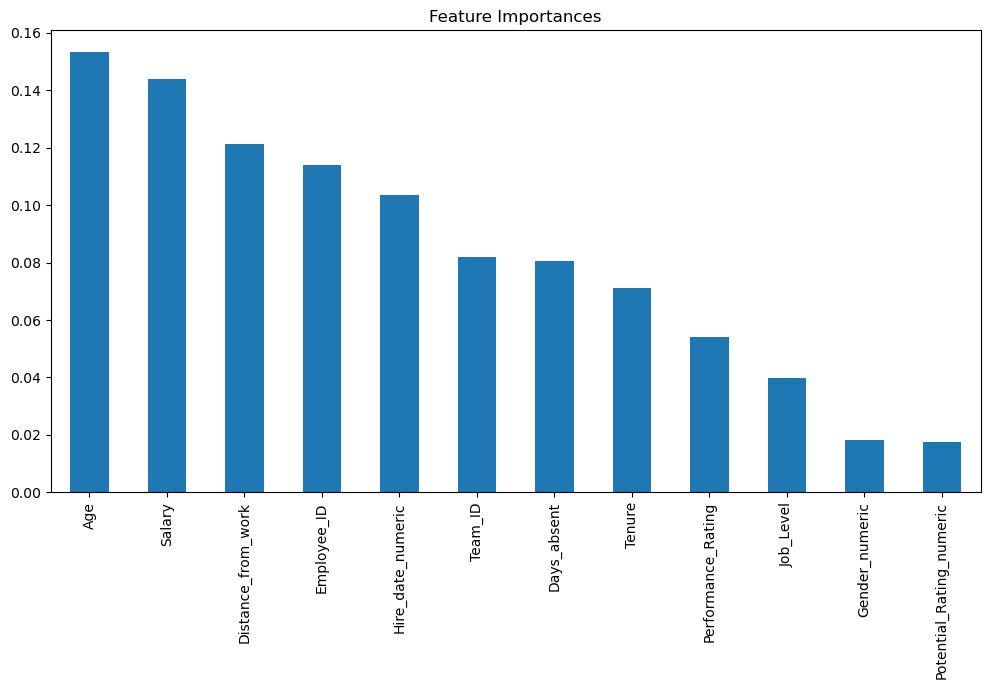

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print(importances)

# Plot
importances.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importances")
plt.show()


Dimensionality Reduction / PCA Analysis

(4864, 3)
3
Explained variance ratio:
 [9.84895296e-01 1.49721654e-02 1.26561159e-04]
Total explained variance: 0.9999940220757106


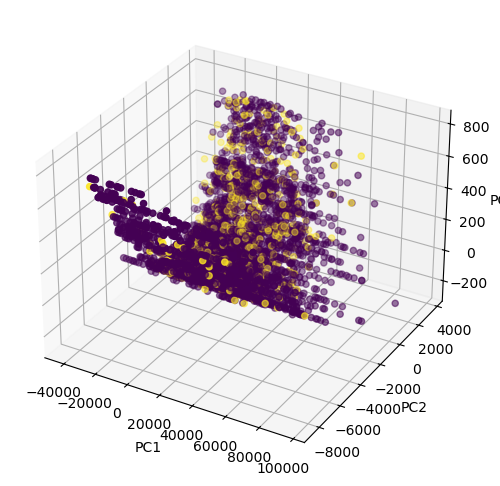

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)  # Reduce to 5 components
X_pca = pca.fit_transform(X)

print(X_pca.shape)
print(pca.n_components_)  # This tells you how many components you kept
print("Explained variance ratio:\n", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])


Use it as your new feature set for modeling and train the regression model

In [ ]:
import time

X_pca_df['volumne_0'] = y.reset_index(drop=True)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Custom function for MAPE and sMAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

# Function to compute AIC for regression models
def compute_aic(y_true, y_pred, num_params):
    residuals = y_true - y_pred
    mse = np.mean(residuals**2)
    n = len(y_true)
    aic = n * np.log(mse) + 2 * num_params  # AIC formula
    return aic

# Split features and target
X = X_pca_df.drop('volumne_0', axis=1)
y = X_pca_df['volumne_0']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_run_start_time = time.time()


# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

model_run_end_time = time.time()

# Calculate execution time in seconds
execution_time = model_run_end_time - model_run_start_time


# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(y_test, y_pred))
print("symmetric_mape", symmetric_mape(y_test, y_pred))
print("aic_sarima:", compute_aic(y_test, y_pred, num_params=X_train.shape[1] + 1))
print("execution_time:", execution_time)


Mean Squared Error: 0.10379609455292908
R^2 Score: -0.035149824080901615
mean_absolute_percentage_error inf
symmetric_mape 192.78901570428525
aic_sarima: -2196.163106479504
execution_time: 2.41625714302063


Cluster the data PCA + clustering (like KMeans) is a powerful combo!

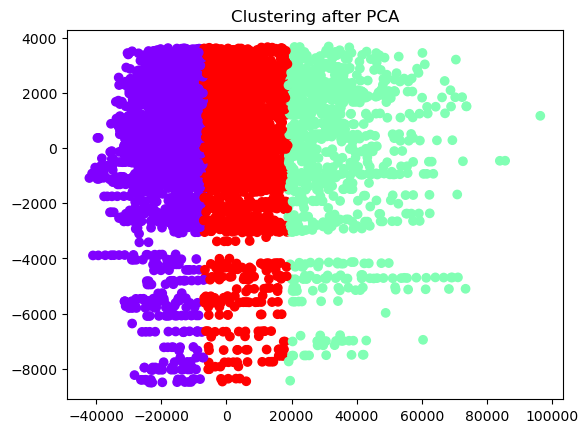

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('Clustering after PCA')
plt.show()


Now, to check feature importance with PCA data

In [ ]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")


PC1: 0.3377280140970687
PC2: 0.33273243440957967
PC3: 0.3295395514933516
